# <center>KAPTEN DATA TEST</center>

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns
import numpy as np
import sqlite3

## Import Dataset rides and users

In [2]:
rides = pd.read_csv('raw_data/rides.csv')


In [3]:
rides.head()

,ride_id,user_id,from_zipcode,to_zipcode,state,quote_date,completed_date,price_nominal,loyalty_points_earned
0,7cd8b375f4577f99414aae0825ecd611,eee42ac4794799ea832a7a7b22ad2214,75019,75018,not_completed,2018-03-31 04:25:45.582,NaN,4.56,0
1,1e594ad1a3717a371c372e97766adb70,88bd8997227391658166a314164df98e,94220,93170,not_completed,2018-05-14 08:14:45.068,NaN,4.84,0
2,4cd25072edbd5eaecc87c86aedcf3d00,0457dec1ec689903dfc4bdd218eb7ce2,75011,75013,completed,2018-04-09 10:31:43.52,2018-04-09 10:52:43.845,4.15,7
3,565b09d786159420be7e8e1058ea76ae,f096efbabf683c5d339d243e1ba46b12,75017,75001,completed,2018-05-21 16:51:46.674,2018-05-21 17:23:12.75,5.05,5
4,9691cb806a1d22ba1d553d344326f357,d596ade95dbb9d89e9b17dc51cb80280,69008,69004,not_completed,2018-05-26 12:37:34.861,NaN,6.75,0


In [4]:
rides.shape

(100000, 9)

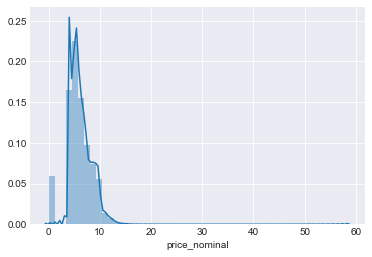

In [5]:
sns.distplot(rides.price_nominal)

rides.completed_date = pd.to_datetime(rides['completed_date']).apply(lambda x: x.date())

In [6]:
rides.quote_date = rides.quote_date.str[:10]

In [7]:
users = pd.read_csv('raw_data/users.csv')

In [8]:
users.head()

,user_id,loyalty_status,loyalty_status_txt
0,0ff74e41e2df2daa789c92721799b109,0,red
1,13ad62a9177ea8f22b44e3f8d7e79955,0,red
2,487fd8a510c647f9ce39b5047d1e9523,0,red
3,f5a30d41c89735bf49dbf09462484d47,0,red
4,d7cefce901f9074c30b7729ccdb3981a,0,red


In [9]:
users.groupby('loyalty_status').count()

,user_id,loyalty_status_txt
loyalty_status,,
0,147605,147605
1,7671,7671
2,3007,3007
3,1188,1188


In [10]:
users.groupby('loyalty_status_txt').count()

,user_id,loyalty_status
loyalty_status_txt,,
gold,3007,3007
platinium,3,3
platinum,1185,1185
red,147605,147605
silver,7671,7671


### We can see that there is three platinium and it is  an error so we are going to change platinium to platinum

In [11]:
users.loyalty_status_txt = users.loyalty_status_txt.replace('platinium', 'platinum')

### We merge rides and users and we want to keep all rows in rides  so we use a left join because we noticed that a lot of user_id in rides dataset are not register in users dataset. 

In [12]:
df = pd.merge(rides, users, how='left', on='user_id')

In [13]:
df.head()

,ride_id,user_id,from_zipcode,to_zipcode,state,quote_date,completed_date,price_nominal,loyalty_points_earned,loyalty_status,loyalty_status_txt
0,7cd8b375f4577f99414aae0825ecd611,eee42ac4794799ea832a7a7b22ad2214,75019,75018,not_completed,2018-03-31,NaN,4.56,0,NaN,NaN
1,1e594ad1a3717a371c372e97766adb70,88bd8997227391658166a314164df98e,94220,93170,not_completed,2018-05-14,NaN,4.84,0,NaN,NaN
2,4cd25072edbd5eaecc87c86aedcf3d00,0457dec1ec689903dfc4bdd218eb7ce2,75011,75013,completed,2018-04-09,2018-04-09 10:52:43.845,4.15,7,3.0,platinum
3,565b09d786159420be7e8e1058ea76ae,f096efbabf683c5d339d243e1ba46b12,75017,75001,completed,2018-05-21,2018-05-21 17:23:12.75,5.05,5,NaN,NaN
4,9691cb806a1d22ba1d553d344326f357,d596ade95dbb9d89e9b17dc51cb80280,69008,69004,not_completed,2018-05-26,NaN,6.75,0,2.0,gold


In [14]:
df.shape

(100000, 11)

<h3>Question 1 : Write a function which returns a dataframe listing all the users, by computing (if needed) the following columns:</h3><br>
* user_id <br>
* loyalty_status <br>
* loyalty_status_txt <br>
* daily_date: date of ride day <br>
* nb_rides: number of completed rides made by the user for the given day <br>
* total_price: total ride price spent by the user for the given day <br>

In [15]:
def all_users_rides_completed():
    df1 = df[df['state']=='completed'].groupby(['user_id','quote_date','loyalty_status', 'loyalty_status_txt']).agg({'price_nominal':['count','sum']})
    return df1
    

In [16]:
all_users_rides_completed().head()

price_nominal  \
                                                                                      count   
user_id                          quote_date loyalty_status loyalty_status_txt                 
0007fa0278af842878d18fb7e82af0e4 2018-03-21 2.0            gold                           1   
0019979af2a05300fe929758a0507164 2018-04-07 1.0            silver                         1   
001eddc5bdb4132f4ce0fae33a446c24 2018-05-22 1.0            silver                         1   
                                 2018-06-02 1.0            silver                         1   
003fbc5cba362ca2f472bbafa45e0e43 2018-05-13 1.0            silver                         1   

                                                                                     
                                                                                sum  
user_id                          quote_date loyalty_status loyalty_status_txt        
0007fa0278af842878d18fb7e82af0e4 2018-03-21 2.0            gold                4.00  
0019979af2a05300fe929758a0507164 2018-04-07 1.0            silver              4.00  
001eddc5bdb4132f4ce0fae33a446c24 2018-05-22 1.0            silver              5.65  
                                 2018-06-02 1.0            silver              5.44  
003fbc5cba362ca2f472bbafa45e0e43 2018-05-13 1.0            silver              4.91

<h3> Question 2:  Write a function which returns a dataframe listing the average basket per day. The average basket is the average completed ride price for a given period of time. </h3>

In [17]:
def average_basket():
    date = df.quote_date.unique()
    average_price = []
    for d in date:
        average_price.append(df.price_nominal[(df['quote_date']==d) & (df['state']=='completed')].sum()/len(df[(df['quote_date']==d) & (df['state']=='completed')]))
    average = pd.DataFrame({'average_price' : average_price}, index=date)
    return average.sort_index()


In [18]:
average_basket().head()

,average_price
2018-03-01,6.276262
2018-03-02,6.182083
2018-03-03,6.064492
2018-03-04,6.443470
2018-03-05,6.349550


<h3> Question 3 : Write a function which returns a dataframe listing the 5 days with the lowest number of completed rides, ordered chronologically. </h3>

In [19]:
def lowest_completed():
    date = df.quote_date.unique()
    completed = []
    for d in date:
        completed.append(df.state[(df['quote_date']==d) & (df['state']=='completed')].count())
    lowest = pd.DataFrame({'completed': completed}, index=date)
    lowest_sorted = lowest.sort_values(by='completed', ascending=True).head(5)
    return lowest_sorted

In [20]:
lowest_sorted = lowest_completed()
lowest_sorted

,completed
2018-06-04,3
2018-04-02,437
2018-04-01,450
2018-05-01,453
2018-05-21,497


<h3>Question 4 : Create a chart plotting the number of completed rides per week for each loyalty status.</h3>

In [21]:
df_copy = df.copy()
df_copy.drop(df_copy[df_copy.state=='not_completed'].index, inplace=True)

In [22]:
df_copy = df_copy.set_index('quote_date')
df_copy = df_copy.sort_index()

In [23]:
pd.date_range(start='2018-03-01', end='2018-06-04', freq='7D')

DatetimeIndex(['2018-03-01', '2018-03-08', '2018-03-15', '2018-03-22',
               '2018-03-29', '2018-04-05', '2018-04-12', '2018-04-19',
               '2018-04-26', '2018-05-03', '2018-05-10', '2018-05-17',
               '2018-05-24', '2018-05-31'],
              dtype='datetime64[ns]', freq='7D')

In [24]:
dates = ['2018-03-01', '2018-03-08', '2018-03-15', '2018-03-22',
               '2018-03-29', '2018-04-05', '2018-04-12', '2018-04-19',
               '2018-04-26', '2018-05-03', '2018-05-10', '2018-05-17',
               '2018-05-24', '2018-05-31', '2018-06-04']

In [25]:
df_copy.loyalty_status_txt = df_copy.loyalty_status_txt.fillna('No_status')

In [26]:
def rides_per_week_per_loyalty():
    completed_rides = []
    week_start = []
    week_end = []
    loyalty_status = []
    for d in range(len(dates)-1):
        for j in df_copy.loyalty_status_txt.unique():
            week_start.append(dates[d])
            week_end.append(dates[d+1])
            test = df_copy[dates[d]:dates[d+1]]
            loyalty_status.append(j)
            completed_rides.append((test.state[(test['state']=='completed') & (test.loyalty_status_txt==j)].count()))
        
    test = pd.DataFrame({'week_start': week_start,
                         'week_end': week_end,
                         'loyalty_status_txt': loyalty_status,
                        'rides': completed_rides})
    return test

In [27]:
test = rides_per_week_per_loyalty()

In [28]:
test.head(10)

,week_start,week_end,loyalty_status_txt,rides
0,2018-03-01,2018-03-08,No_status,4773
1,2018-03-01,2018-03-08,platinum,216
2,2018-03-01,2018-03-08,silver,151
3,2018-03-01,2018-03-08,red,102
4,2018-03-01,2018-03-08,gold,190
5,2018-03-08,2018-03-15,No_status,5006
6,2018-03-08,2018-03-15,platinum,207
7,2018-03-08,2018-03-15,silver,139
8,2018-03-08,2018-03-15,red,71
9,2018-03-08,2018-03-15,gold,208


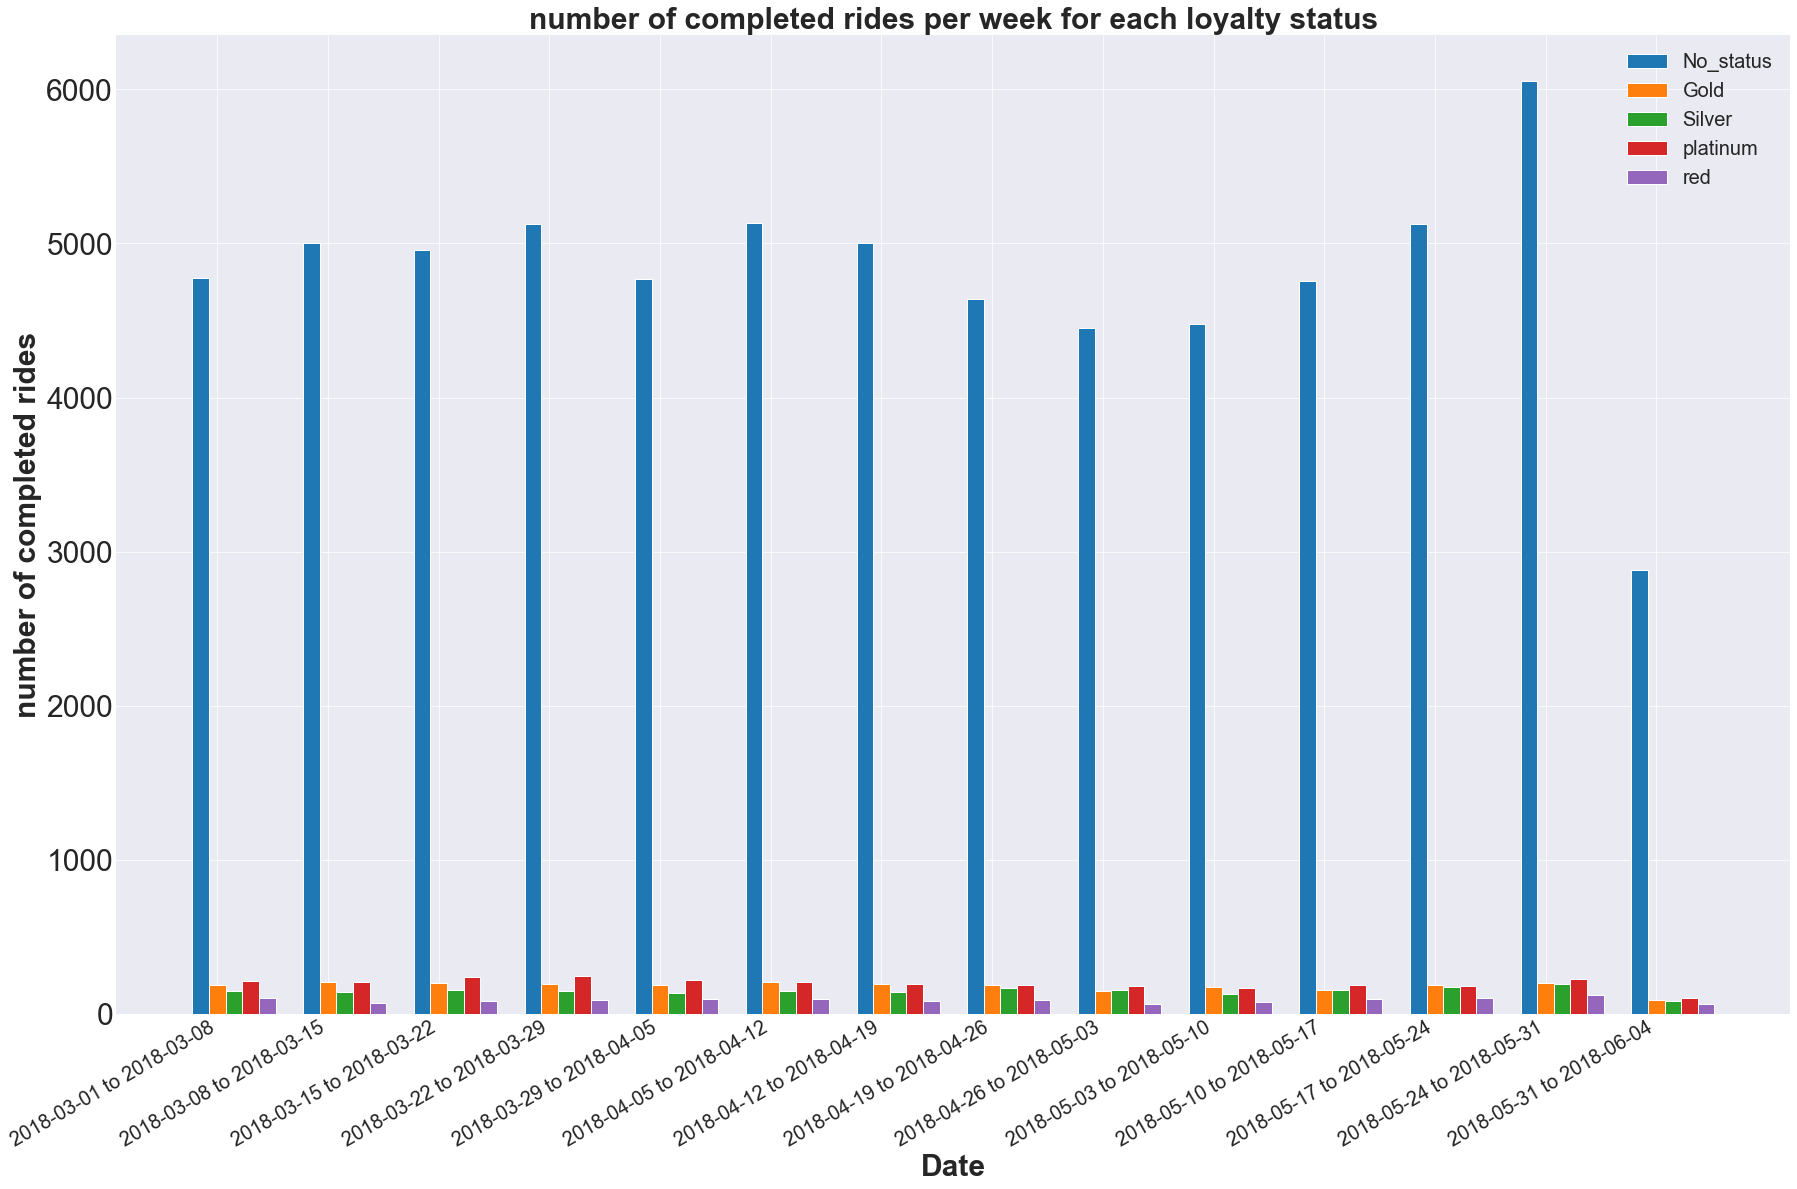

In [29]:
plt.figure(figsize=(30, 20))
plt.xticks(fontsize=20)
plt.yticks(fontsize=30)
# set width of bar
barWidth = 0.15
 
# set height of bar
bars_NS = test.rides.values[test.loyalty_status_txt=='No_status']
bars_gold = test.rides.values[test.loyalty_status_txt=='gold']
bars_silver = test.rides.values[test.loyalty_status_txt=='silver']
bars_platinium = test.rides.values[test.loyalty_status_txt=='platinum']
bars_red = test.rides.values[test.loyalty_status_txt=='red']
 
# Set position of bar on X axis
r1 = np.arange(len(bars_NS))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, bars_NS, width=barWidth, edgecolor='white', label='No_status')
plt.bar(r2, bars_gold, width=barWidth, edgecolor='white', label='Gold')
plt.bar(r3, bars_silver, width=barWidth, edgecolor='white', label='Silver')
plt.bar(r4, bars_platinium, width=barWidth, edgecolor='white', label='platinum')
plt.bar(r5, bars_red, width=barWidth, edgecolor='white', label='red')
 
# Add xticks on the middle of the group bars
plt.xlabel('Date', fontweight='bold', fontsize=30)
plt.ylabel('number of completed rides', fontweight='bold', fontsize=30)
plt.xticks([r + barWidth for r in range(len(bars_NS))], (test.week_start+' to ' +test.week_end).unique())
 
# Create legend & Show graphic
plt.legend(fontsize=20)
plt.gcf().autofmt_xdate()
plt.title("number of completed rides per week for each loyalty status", fontweight='bold', fontsize=30)
plt.show()


<h3>Part 2 : SQL (question 1 to 3)</h3>

In [ ]:
#connect to a database
conn = sqlite3.connect("df.db") #if the db does not exist, this creates a Any_Database_Name.db file in the current directory
#store your table in the database:
df.to_sql('df', conn)


In [30]:
%load_ext sql

In [31]:
%sql sqlite:///df.db

'Connected: @df.db'

<h3>Question 1 : Write a function which returns a dataframe listing all the users, by computing (if needed) the following columns:</h3><br>
* user_id <br>
* loyalty_status <br>
* loyalty_status_txt <br>
* daily_date: date of ride day <br>
* nb_rides: number of completed rides made by the user for the given day <br>
* total_price: total ride price spent by the user for the given day <br>

In [32]:
%%sql sqlite:// 
SELECT user_id, quote_date, loyalty_status, loyalty_status_txt, COUNT(price_nominal) as nb_rides, SUM(price_nominal) as total_price 
FROM df WHERE state=="completed" 
GROUP BY user_id, quote_date
LIMIT 10

Done.


user_id,quote_date,loyalty_status,loyalty_status_txt,nb_rides,total_price
0000af9ab58d7fbcc7c61dfb0a2a68ff,2018-03-16,None,None,1,5.48
00017c0c4e322c681be8751e26da01ff,2018-04-02,None,None,1,8.37
0005915fe3e66e94062882a0238e0d52,2018-04-13,None,None,1,7.35
0005915fe3e66e94062882a0238e0d52,2018-05-02,None,None,1,5.97
00071a88562ceee2b3767bd815334d11,2018-03-03,None,None,1,5.95
0007fa0278af842878d18fb7e82af0e4,2018-03-21,2.0,gold,1,4.0
000a46893a5983fe3985d84841e9c9c0,2018-04-04,None,None,1,6.93
000a46893a5983fe3985d84841e9c9c0,2018-05-02,None,None,1,5.97
000a46893a5983fe3985d84841e9c9c0,2018-05-16,None,None,1,5.9
000af9764248b5913a78fb2de5f1c50f,2018-04-28,None,None,1,5.47


<h3> Question 2:  Write a function which returns a dataframe listing the average basket per day. The average basket is the average completed ride price for a given period of time. </h3

In [33]:
%%sql sqlite://
SELECT quote_date, AVG(price_nominal) as average_price
FROM df 
WHERE state=="completed"
GROUP BY quote_date
LIMIT 10

Done.


quote_date,average_price
2018-03-01,6.2762616822429855
2018-03-02,6.182083333333322
2018-03-03,6.064491803278694
2018-03-04,6.443470149253732
2018-03-05,6.3495503875968975
2018-03-06,6.276956521739133
2018-03-07,6.501221374045803
2018-03-08,6.376679104477604
2018-03-09,6.387546174142483
2018-03-10,6.128785046728974


<h3> Question 3 : Write a function which returns a dataframe listing the 5 days with the lowest number of completed rides, ordered chronologically. </h3>

In [34]:
%%sql sqlite://
SELECT quote_date, COUNT(state) as lowest_completed_rides 
FROM df
WHERE state=="completed" 
GROUP BY quote_date 
ORDER BY lowest_completed_rides  
LIMIT 5

Done.


quote_date,lowest_completed_rides
2018-06-04,3
2018-04-02,437
2018-04-01,450
2018-05-01,453
2018-05-21,497
